In [1]:
import silq
silq.initialize('Antimony')

%matplotlib notebook

Initializing imports
Initializing functions
Initializing instruments
Initializing parameters
Initializing data
Initializing plotting
Initialization complete


In [18]:
ch_name = 'RDS'
ch = 8
ratio = 4
max_voltage = 2
SIM900.define_slot(channel=ch, name=ch_name+'_raw', max_voltage=max_voltage*ratio)
param_raw = SIM900.parameters[ch_name+'_raw']
param = ScaledParameter(param_raw, name=ch_name, label=ch_name, ratio=ratio)
SIM900_scaled_parameters.append(param)
RDS = param

NameError: name 'station' is not defined

In [26]:
ramp_to_voltages(0)

In [6]:
LB(0.48)
RB(0.48)
SRC(0.15)
TG(1.25)

# Turnon

In [2]:
vals = list(np.arange(0, 1.4, 0.002))
len(vals)

700

DataSet:
   location = '2017-05-04/#003_turnon_10-50-32'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | TG_LB_RB_set | TG_LB_RB     | (700,)
   Measured | DC_voltage   | DC_voltage   | (700,)


<IPython.core.display.Javascript object>


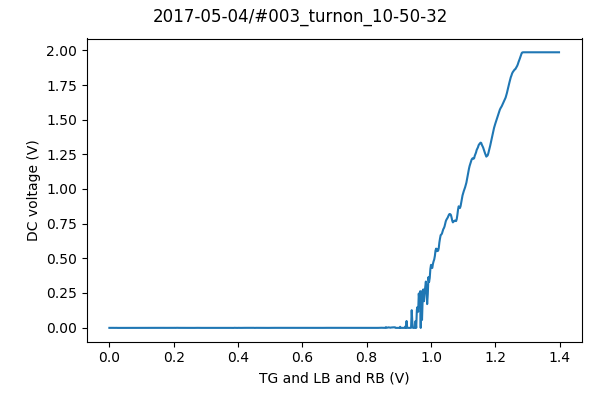

setting active
deactivating
DataSet:
   location = '2017-05-04/#003_turnon_10-50-32'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | TG_LB_RB_set | TG_LB_RB     | (700,)
   Measured | DC_voltage   | DC_voltage   | (700,)
started at 2017-05-04 10:56:42


In [3]:
DC_parameter.setup()
loop = Loop(turnon_parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name='turnon')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()

# Pinchoff

In [3]:
pinchoff_parameter = RB
turnon_parameter(1.1)

vals = list(np.arange(1.1, 0, -0.002))
len(vals)

550

DataSet:
   location = '2017-05-04/#005_pinchoff_RB_11-04-37'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | RB_set     | RB           | (550,)
   Measured | DC_voltage | DC_voltage   | (550,)


<IPython.core.display.Javascript object>


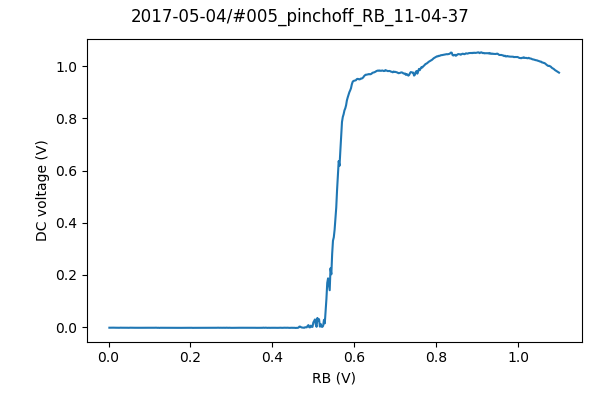

deactivating
DataSet:
   location = '2017-05-04/#005_pinchoff_RB_11-04-37'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | RB_set     | RB           | (550,)
   Measured | DC_voltage | DC_voltage   | (550,)
started at 2017-05-04 11:06:46


In [4]:
DC_parameter.setup()
loop = Loop(pinchoff_parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name=f'pinchoff_{pinchoff_parameter.name}')
plot = loop.plot(data.DC_voltage)

loop.run();

layout.stop()

# 1D Coulomb

In [32]:
parameter = TG
vals = list(np.arange(1.1, 1.6, 0.001))
len(vals)

500

In [38]:
DC_parameter.setup()
%timeit DC_parameter()

10 loops, best of 3: 74.9 ms per loop


<IPython.core.display.Javascript object>


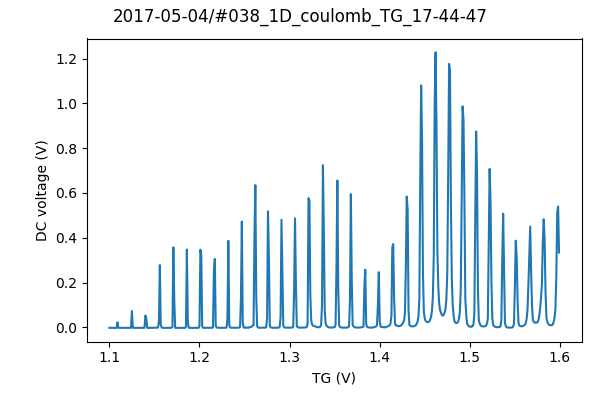

DataSet:
   data = load_data('2017-05-04/#038_1D_coulomb_TG_17-44-47')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TG_set     | TG           | (500,)
   Measured | DC_voltage | DC_voltage   | (500,)
started at 2017-05-04 17:44:48


In [37]:
DC_parameter.setup()
loop = Loop(parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name=f'1D_coulomb_{parameter.name}')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()
parameter(vals[0])

# 2D scans

In [34]:
x_vals = TG[np.arange(1.1, 1.4, 0.00025).tolist()]
y_vals = DF_DS[np.arange(0,0.8, 0.002).tolist()]
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X1200 x Y400


In [31]:
x_vals = DF_DS.sweep(0.2, 0.7, num=150)
y_vals = TGAC.sweep(-0.1, 0.1, num=50)
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X150 x Y50


<IPython.core.display.Javascript object>


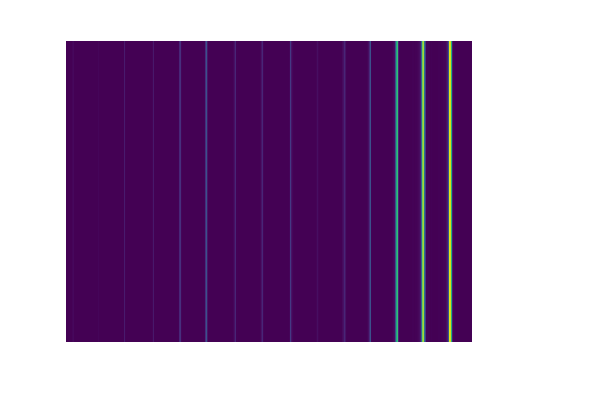

DataSet:
   data = load_data('2017-05-09/#007_2D_DC_TG_DF_DS_11-33-31')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | DF_DS_set  | DF_DS        | (400,)
   Setpoint | TG_set     | TG           | (400, 1200)
   Measured | DC_voltage | DC_voltage   | (400, 1200)
started at 2017-05-09 11:33:31


KeyboardInterrupt: 

In [35]:
DC_parameter.setup()
loop = Loop(y_vals).loop(
    x_vals).each(
        DC_parameter)
data = loop.get_data_set(name=f'2D_DC_{x_vals.name}_{y_vals.name}')
plot = loop.actions[0].plot(data.DC_voltage)
loop.run()

layout.stop()

# Compensated scan

<IPython.core.display.Javascript object>


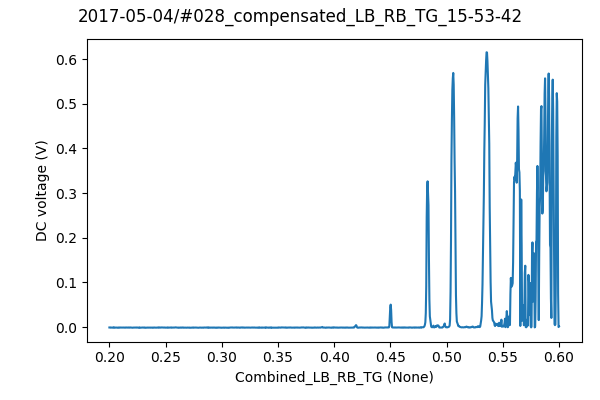

DataSet:
   data = load_data('2017-05-04/#028_compensated_LB_RB_TG_15-53-42')
   <Type>   | <array_id>            | <array.name>      | <array.shape>
   Setpoint | Combined_LB_RB_TG_set | Combined_LB_RB_TG | (1000,)
   Measured | DC_voltage            | DC_voltage        | (1000,)
   Measured | LB                    | LB                | (1000,)
   Measured | RB                    | RB                | (1000,)
   Measured | TG                    | TG                | (1000,)
started at 2017-05-04 15:53:42


In [4]:
pts = 1000
LB_vals = np.linspace(0.2, 0.6, pts)
RB_vals = LB_vals
TG_vals = np.linspace(1.55, 1.05, pts)
sweep_vals = np.array([LB_vals, RB_vals, TG_vals]).transpose().tolist()

DC_parameter.setup()
loop = qc.Loop(qc.combine(LB, RB, TG, name='Combined_LB_RB_TG',
                          aggregator=lambda x, y, z: x).sweep(sweep_vals)).each(
    DC_parameter)
data = loop.get_data_set(name='compensated_LB_RB_TG')
plot = loop.plot(data.DC_voltage)
loop.run()

layout.stop()

# Continuous single point scan

<IPython.core.display.Javascript object>


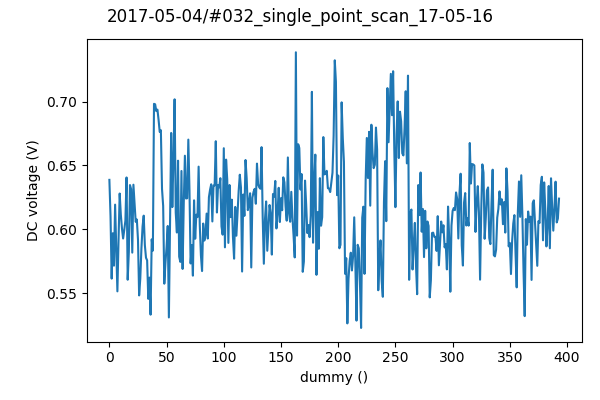

DataSet:
   data = load_data('2017-05-04/#032_single_point_scan_17-05-16')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | dummy_set  | dummy        | (5000,)
   Measured | DC_voltage | DC_voltage   | (5000,)
started at 2017-05-04 17:05:16


KeyboardInterrupt: 

In [16]:
DC_parameter.setup()
loop = Loop(dummy_parameter[0:5000:1], delay=0.2).each(DC_parameter)
data = loop.get_data_set(name='single_point_scan')
plot = loop.plot(data.DC_voltage)
loop.run()